In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# I used 300 as K, however it can be ran at any temperature 

In [2]:
def Ktr (HI,I2,H2,T):
    HITR = ( ((2*np.pi*HI*1.38e-23*T)**(1/2)) /6.626e-34)**3
    I2TR = ( ((2*np.pi*I2*1.38e-23*T)**(1/2)) /6.626e-34)**3
    H2fTR = ( ((2*np.pi*H2*1.38e-23*T)**(1/2)) /6.626e-34)**3
    Keq = (HITR**2) / (I2TR * H2fTR)
    return Keq * 6.022e26

In [3]:
# this is the value of the translational ratio at 300 
# mass is in Kg
Ktr_at_300 = Ktr(2.12e-25,4.24e-25,3.32e-27,300)
print("at 300K the translational ratio is", Ktr_at_300)

at 300K the translational ratio is 1.0864066705497393e+29


In [4]:
# both I2 and HI are linear but they have 2 rot constant
# what I did is used the formula for linear molecules and multipled
# them similarly to what we did in pset 6 with vib
def Krot (HIA,HIB,I2A,I2B,BH2, sigmaHI,sigmaH2,sigmaI2,T):
    HI = (1.38e-23*T/ (sigmaHI*HIA)) * (1.38e-23*T/ (sigmaHI*HIB))
    I2 = (1.38e-23*T/ (sigmaI2*I2A) ) * (1.38e-23*T/ (sigmaI2*I2B))
    H2 = (1.38e-23*T/ (sigmaH2*BH2) )
    return (HI**2) / (I2* H2)

In [5]:
# conversion from cm to kj/mol
one = (6.42637*100*3e8*6.626e-34)
two = (6.42637*100*3e8*6.626e-34)
three = (0.3737*100*3e8*6.626e-34)
four = (0.3737*100*3e8*6.626e-34)
five = (60.844*100*3e8*6.626e-34)

In [6]:
Krot_at_300 = Krot(one,two,three,four,five,1,2,2,300)
print ("at 300K the rotational ratio is", Krot_at_300)

at 300K the rotational ratio is 8.300775896414768


In [7]:
def Kvib (HIw, H2w, I2w, T):
    Beta = 1/(1.38e-23*T)
    h = 6.626e-34

    HIBHw = Beta*h*HIw*3e8*100
    H2BHw = Beta*h*H2w*3e8*100
    I2BHw = Beta*h*I2w*3e8*100

    HIf = (np.exp(-1*HIBHw/2)) / ( 1-np.exp(-1*HIBHw) )
    H2f = (np.exp(-1*H2BHw/2)) / ( 1-np.exp(-1*H2BHw) )
    I2f = (np.exp(-1*I2BHw/2)) / ( 1-np.exp(-1*I2BHw) )
    
    return (HIf**2) / ( I2f * H2f )

In [8]:
Kvib_at_300 = Kvib(2230,4161,213,300)
print ("at 300K the vibrational ratio is", Kvib_at_300)

at 300K the vibrational ratio is 0.5209452471648024


In [9]:
def Kel (HIE, I2E, H2E, T):
    temp = 0.0083144*T
    HI = np.exp(-1*HIE/temp)
    I2 = np.exp(-1*I2E/temp)
    H2 = np.exp(-1*H2E/temp)
    return (HI**2) / (I2 * H2)

In [10]:
Kel_at_300 = Kel(-330.225,-179.5499,-457,300)
print ("at 300K the electronic ratio is", Kel_at_300)

at 300K the electronic ratio is 14498.636246633974


In [11]:
def Kproduct (T):
    Ktranslational = Ktr(2.12e-25,4.24e-25,3.32e-27,T)
    Krotational = Krot(one,two,three,four,five,1,2,2,T)
    Kvibrational = Kvib(2230,4161,213,T)
    Kelectronic = Kel(-330.225,-179.5499,-457 , T)
    return Ktranslational * Krotational * Kvibrational * Kelectronic

In [12]:
Keq = []
for i in np.arange(300,3000,1):
    Keq.append(Kproduct(i))
Keq_array = np.array(Keq)

In [13]:
log10Keq = np.log10(Keq_array)

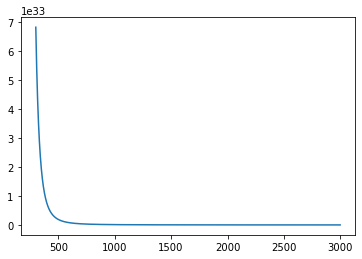

In [14]:
plt.plot(np.arange(300,3000,1),Keq)

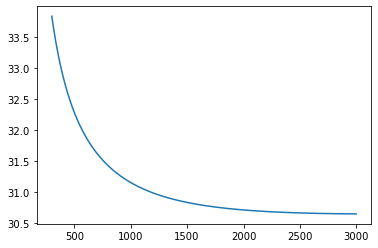

In [15]:
plt.plot(np.arange(300,3000,1),log10Keq)

In [16]:
at_300 = Kproduct(300)
print("Keq at 300K is",at_300)
at_1000 = Kproduct(1000)
print("Keq at 1000K is", at_1000)
at_3000 = Kproduct(3000)
print("Keq at 3000K is", at_3000)

Keq at 300K is 6.811305296366313e+33
Keq at 1000K is 1.43237426600731e+31
Keq at 3000K is 4.4798869763282135e+30


In [ ]:
# I skipped to number 4

In [17]:
# perameters 
# the circle goes from 0 to 2pi
# the vector = np.sqrt ( cos(theta)**2 + sin(theta)**2 )

In [22]:
spins = np.ones(20)

def quantum_energy(spins,kt):
    return -1*np.dot(spins[1:], spins[:-1])

In [23]:
def quantum_move(spins,kt):
    spin1 = quantum_energy(spins,kt)
    # flipping a spin
    the_flipped_spin = np.random.choice([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
    # there are 20 spins that can be flipped 
    spins[the_flipped_spin] *= -1   
    spins2 = quantum_energy(spins,kt)
    if spins2 < spin1 : 
        pass
    else:
        energy = np.exp(-(spins2-spin1)/kt)
        if np.random.random() < energy:
            pass
        else:
            spins[the_flipped_spin] *= -1

In [78]:
def magnitude(spins):
    return np.sum(spins)

In [82]:
n_steps = 100000
magnitudes = np.zeros(100000)
for i in range(100000):
    magnitudes[i] = magnitude(spins)
    quantum_move(spins,1)

In [83]:
bin_edge = np.array([-1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])

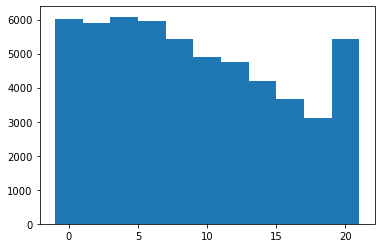

In [84]:
plt.hist(magnitudes, bins = bin_edge)
plt.show()

In [ ]:
# 2KBT

In [104]:
spins2kbt = np.ones(20)
n_steps2kbt = 100000
magnitudes2kbt = np.zeros(100000)
for i in range(100000):
    magnitudes2kbt[i] = magnitude(spins2kbt)
    quantum_move(spins2kbt,2)

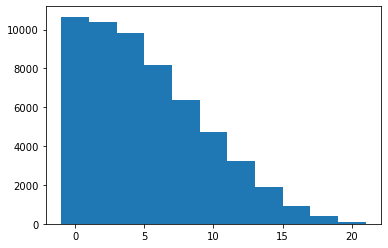

In [105]:
plt.hist(magnitudes2kbt, bins = bin_edge)
plt.show()

In [106]:
#4kbt

In [107]:
spins4kbt = np.ones(20)
n_steps4kbt = 100000
magnitudes4kbt = np.zeros(100000)
for i in range(100000):
    magnitudes4kbt[i] = magnitude(spins4kbt)
    quantum_move(spins4kbt,4)

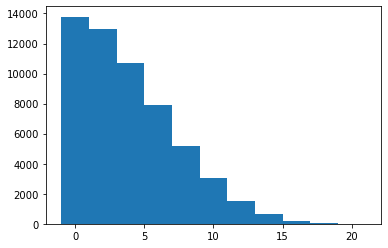

In [108]:
plt.hist(magnitudes4kbt, bins = bin_edge)
plt.show()

In [59]:
# starts at all up
up_positions = np.zeros(20)
classical_spins = np.sqrt ( (np.cos(up_positions))**2 + (np.sin(up_positions))**2 )
classical_spins

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [60]:
def classical_energy(classical_spins,kt):
    return -1*np.dot(classical_spins[1:], classical_spins[:-1])

In [71]:
def classical_move(classical_spins,kt):
    spin1 = classical_energy(classical_spins,kt)
    # flipping a spin
    # the possible values of theta are 0 to 2pi
    the_flipped_spin = np.random.choice([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
    values_of_theta = np.linspace(0,2*np.pi,50)
    theta = np.random.choice(values_of_theta)
    # the vector is np.sqrt ( cos(theta)**2 + sin(theta)**2 )
    new_vector = np.sqrt ( (np.cos(theta))**2 + (np.sin(theta))**2 )
    classical_spins[the_flipped_spin] *= -1 
    spins2 = classical_energy(classical_spins,kt)
    if spins2 < spin1 : 
        pass
    else:
        energy = np.exp(-(spins2-spin1)/kt)
        if np.random.random() < energy:
            pass
        else:
            classical_spins[the_flipped_spin] *= new_vector

In [109]:
def classical_magnitude(spins):
    return np.sum(spins)

In [110]:
n_steps = 100000
classical_magnitudes = np.zeros(100000)
for i in range(100000):
    classical_magnitudes[i] = classical_magnitude(spins)
    classical_move(spins,1)

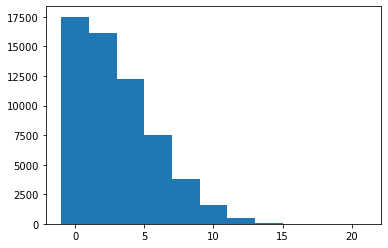

In [111]:
plt.hist(classical_magnitudes, bins = bin_edge)
plt.show()

In [101]:
#2kbt
up_positions2kbt = np.zeros(20)
classical_spins2kbt = np.sqrt ( (np.cos(up_positions))**2 + (np.sin(up_positions))**2 )

In [112]:
n_steps2kbtclassical = 100000
classical_magnitudes2kbt = np.zeros(100000)
for i in range(100000):
    classical_magnitudes2kbt[i] = classical_magnitude(spins)
    classical_move(spins,2)

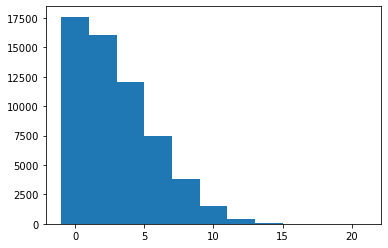

In [113]:
plt.hist(classical_magnitudes2kbt, bins = bin_edge)
plt.show()

In [114]:
# 4kbt

In [115]:
#4kbt
up_positions4kbt = np.zeros(20)
classical_spins4kbt = np.sqrt ( (np.cos(up_positions))**2 + (np.sin(up_positions))**2 )

In [116]:
n_steps4kbtclassical = 100000
classical_magnitudes4kbt = np.zeros(100000)
for i in range(100000):
    classical_magnitudes4kbt[i] = classical_magnitude(spins)
    classical_move(spins,4)

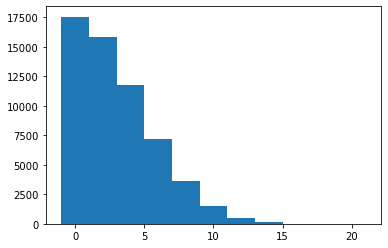

In [117]:
plt.hist(classical_magnitudes4kbt, bins = bin_edge)
plt.show()

In [118]:
# classical has a lower magnitude 
# at higher temps the quantum system looks like the classical
# at higher temperatures the magnitizations drops

In [ ]:
# number 3

In [141]:
def molecules_adsorbed(P):
    #conversion from frequency to KJ/mol
    omega = 100*100*3e8*6.626e-34
    hJ = 6.626e-34
    Planck_constant = (hJ)**3
    massH2 = 3.32e-27
    mass2pi = (massH2*np.pi*2)**(3/2)
    Kb = 1.38e-23
    KbT = Kb*300
    temp = (KbT)**(5/2)
    beta = 1/(KbT)
    PqT = (mass2pi*temp)/Planck_constant
    epsilon = (30*1000)/6.022e23
    energy = epsilon + hJ*omega
    exponential = PqT*np.exp(-1*beta*energy)
    return P/(P+exponential)

In [142]:
P110 = []
for i in np.arange(0,1013250,5000):
    P110.append(molecules_adsorbed(i))
theta300 = np.array(P110)

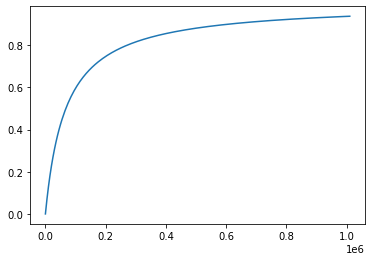

In [143]:
plt.plot(np.arange(1,1013250,5000),P110)

In [144]:
# 1 ATM
molecules_adsorbed(101325)

0.5988071440958016

In [145]:
# 3 ATM
molecules_adsorbed(303975)

0.8174416420297593

I hope you have a wonderful break. It has been a really nice class. See you around!